In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import datetime as dt
from glob import glob

In [129]:
#Creating list of filenames
csv_files = glob("input/*.csv")
json_files = glob("input/*.json")

#Loading files into variables
df_list = list(map(lambda z: pd.read_csv(z,index_col='video_id'), csv_files))
germany_js, canada_js, france_js = list(map(lambda a: json.load(open(a,'r')), json_files))

In [130]:
df_list[4].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [131]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 40840 entries, LgVi6y5QIjM to go-F6xvezAM
Data columns (total 15 columns):
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
dtypes: bool(3), int64(5), object(7)
memory usage: 4.2+ MB


In [132]:
def column_dropper(df):
    new_df = df.drop(columns=['description', 'tags', 'thumbnail_link'])
    return new_df

df_list2 = list(map(column_dropper, df_list)) 
df_list[0].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [133]:
def category_dict_maker(js):
    items = js['items']
    item_id = []
    item_snippet_title = []
    for item in items:
        item_id.append(item['id']) 
        item_snippet_title.append(str(item['snippet']['title']))
    item_dict = dict(zip(item_id, item_snippet_title))
    return(item_dict)

brit_dict = category_dict_maker(canada_js)

def category_maker(value):
    for key in brit_dict:
        if str(value) == key:
            return (brit_dict[key])
        else:
            continue

def cat_applier(df):
    df['category'] = df.category_id.apply(func=category_maker)
    df.category = df.category.astype('category')
    return df.drop(columns=['category_id'])

df_list3 = list(map(cat_applier, df_list2))    
df_list3[0].head()

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
video_id,,,,,,,,,,,,
LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,2017-11-13T17:08:49.000Z,252786,35885,230,1539,False,False,False,Entertainment
Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,2017-11-12T22:30:01.000Z,797196,53576,302,1278,False,False,False,Comedy
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783,97190,6146,12703,False,False,False,Entertainment
AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,2017-11-12T15:00:01.000Z,380247,31821,458,1955,False,False,False,Education
ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,2017-11-12T13:10:36.000Z,822213,100684,2467,10244,False,False,False,Entertainment


In [134]:
def string_convertor(string):
    yy=string[0:2]
    dd=string[3:5]
    mm=string[6:8]
    new_string = str("20"+yy+"-"+mm+"-"+dd)
    return new_string

def datetime_setter(df):
    df.trending_date = pd.to_datetime(df.trending_date.apply(string_convertor), errors='coerce')
    df.publish_time = pd.to_datetime(df.publish_time, errors='coerce')
    return df

df_list4 = list(map(datetime_setter, df_list3)) 
df_list4[0].head()

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
video_id,,,,,,,,,,,,
LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,2017-11-13 17:08:49,252786,35885,230,1539,False,False,False,Entertainment
Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,2017-11-12 22:30:01,797196,53576,302,1278,False,False,False,Comedy
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97190,6146,12703,False,False,False,Entertainment
AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,2017-11-12 15:00:01,380247,31821,458,1955,False,False,False,Education
ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,2017-11-12 13:10:36,822213,100684,2467,10244,False,False,False,Entertainment


In [180]:
canada[0]

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
video_id,,,,,,,,,,,,
LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,2017-11-13 17:08:49,252786,35885,230,1539,False,False,False,Entertainment
Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,2017-11-12 22:30:01,797196,53576,302,1278,False,False,False,Comedy
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97190,6146,12703,False,False,False,Entertainment
AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,2017-11-12 15:00:01,380247,31821,458,1955,False,False,False,Education
ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,2017-11-12 13:10:36,822213,100684,2467,10244,False,False,False,Entertainment
xapGFgWqtg4,2017-11-14,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,2017-11-13 01:49:24,32709,3093,296,63,False,False,False,People & Blogs
EIM7RMe39JY,2017-11-14,Kanaken auf der Klassenfahrt,Bodyformus,2017-11-13 11:59:04,308683,35704,578,1398,False,False,False,Comedy
PaWTaj6Iie0,2017-11-14,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,2017-11-13 18:09:55,181660,17998,169,554,False,False,False,People & Blogs
GHct2dGNLks,2017-11-14,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,2017-11-12 11:53:45,369173,16953,570,611,False,False,False,Comedy


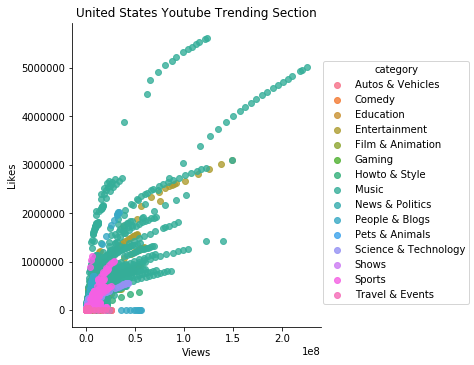

In [187]:
sns.lmplot('views', 'likes', data = canada[3], hue='category', fit_reg=False);
plt.title('United States Youtube Trending Section');
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

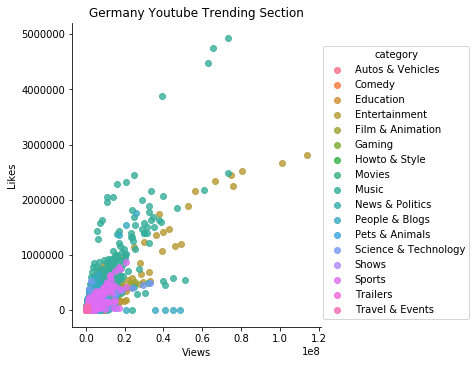

In [191]:
sns.lmplot('views', 'likes', data=germany[0], hue='category', fit_reg=False);
plt.title('Germany Youtube Trending Section')
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

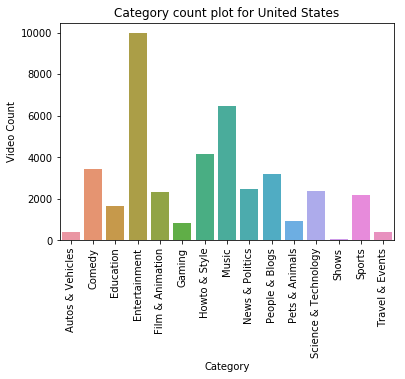

In [189]:
sns.countplot('category', data=canada[3])
plt.title('Category count plot for United States')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=90)
plt.show()

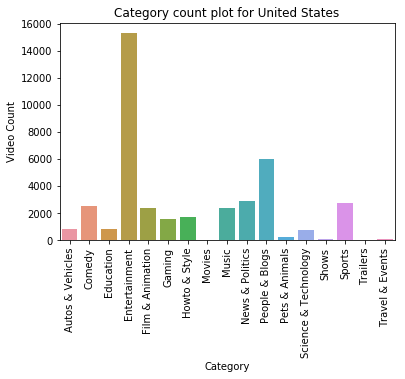

In [192]:
sns.countplot('category', data=germany[0])
plt.title('Category count plot for Germany')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=90)
plt.show()